<a href="https://colab.research.google.com/github/sazio/NMAs/blob/main/src/Data_Loader_KMeans_Custom_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Stringer Dataset 
@authors: Simone Azeglio, Chetan Dhulipalla , Khalid Saifullah 


Part of the code here has been taken from [Neuromatch Academy's Computational Neuroscience Course](https://compneuro.neuromatch.io/projects/neurons/README.html), and specifically from [this notebook](https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/master/projects/neurons/load_stringer_spontaneous.ipynb)

## Loading of Stringer spontaneous data



In [2]:
#@title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

In [3]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

## Exploratory Data Analysis (EDA)

In [4]:
#@title Data loading
import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


In [5]:
# functions 

def moving_avg(array, factor = 5):
    """Reducing the number of compontents by averaging of N = factor
    subsequent elements of array"""
    #zeros_ = np.zeros((array.shape[0], 2))
    #array = np.hstack((array, zeros_))

    array = np.reshape(array, (array.shape[0],  int(array.shape[1]/factor), factor))
    array = np.mean(array, axis = 2)

    return array

## Spatial (XYZ) KMeans Clustering on Neurons


In [6]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.decomposition import PCA

In [16]:
for n_clusters in range(2, 21):

    kmeans = KMeans(n_clusters= n_clusters, random_state=2021).fit(dat["xyz"].T)

    labels = kmeans.labels_#le.fit_transform(z)
    ### least represented class (layer with less neurons)
    n_samples = np.min(np.histogram(labels, bins= n_clusters)[0])
    #print(n_samples)

    dataSet = pd.DataFrame(dat["sresp"])
    dataSet["label"] = labels 

    # it can be done in one loop ... 
    data_ = []
    for i in range(0, n_clusters):
        data_.append(dataSet[dataSet["label"] == i].sample(n = n_samples).iloc[:,:-1].values)

    dataRNN = np.zeros((n_samples*n_clusters, dataSet.shape[1]-1))
    for i in range(0,n_clusters):

        # dataRNN[n_samples*i:n_samples*(i+1), :] = data_[i]
        ## normalized by layer
        dataRNN[n_samples*i:n_samples*(i+1), :] = data_[i]/np.mean(np.asarray(data_)[i,:,:], axis = 0)

    # downsampling and averaging 
    #avgd_normed_dataRNN = dataRNN#
    avgd_normed_dataRNN = moving_avg(dataRNN, factor=2)

    #-----------------------------#
    print("\n#-------- Number of clusters = " + str(n_clusters) +" ---------#")
    print("\nNumber of samples for each layer = " + str(n_samples) +" \tFraction of samples = " + str(n_samples//10))
    saved_pca = []
    for mul in range(0,n_clusters):
        pca = PCA(n_components=n_samples//10 + 1, random_state = 2021)
        pca.fit(avgd_normed_dataRNN[n_samples*mul:n_samples*(mul+1),:].T)
        saved_pca.append(np.cumsum(pca.explained_variance_ratio_)[n_samples//10])
        #print(np.cumsum(pca.explained_variance_ratio_)[100])
    print("\nAVG Score = " + str(sum(saved_pca)/len(saved_pca)))
    print("\n#-------------------------------#")


#-------- Number of clusters = 2 ---------#

Number of samples for each layer = 5076 	Fraction of samples = 507

AVG Score = 0.7499534748996398

#-------------------------------#

#-------- Number of clusters = 3 ---------#

Number of samples for each layer = 3369 	Fraction of samples = 336

AVG Score = 0.7165587812076589

#-------------------------------#

#-------- Number of clusters = 4 ---------#

Number of samples for each layer = 2428 	Fraction of samples = 242

AVG Score = 0.7038076922480381

#-------------------------------#

#-------- Number of clusters = 5 ---------#

Number of samples for each layer = 1621 	Fraction of samples = 162

AVG Score = 0.6805205095661713

#-------------------------------#

#-------- Number of clusters = 6 ---------#

Number of samples for each layer = 1503 	Fraction of samples = 150

AVG Score = 0.66582733878269

#-------------------------------#

#-------- Number of clusters = 7 ---------#

Number of samples for each layer = 1358 	Fraction of sam

## Z-Slicing Clustering

In [8]:
import pandas as pd 
from sklearn import preprocessing

In [21]:
# Extract labels from z - coordinate
x, y, z = dat['xyz']

le = preprocessing.LabelEncoder()
labels = le.fit_transform(z)
### least represented class (layer with less neurons)
n_samples = np.min(np.histogram(labels, bins=9)[0])


dataSet = pd.DataFrame(dat["sresp"])
dataSet["label"] = labels 

data_ = []
for i in range(0, 9):
    data_.append(dataSet[dataSet["label"] == i].sample(n = n_samples).iloc[:,:-1].values)

dataRNN = np.zeros((n_samples*9, dataSet.shape[1]-1))
for i in range(0,9):
    
    # dataRNN[n_samples*i:n_samples*(i+1), :] = data_[i]
    ## normalized by layer
    dataRNN[n_samples*i:n_samples*(i+1), :] = data_[i]/np.mean(np.asarray(data_)[i,:,:], axis = 0)
    
avgd_normed_dataRNN = moving_avg(dataRNN, factor=2)

print("\n#-------- Number of clusters = " + str(9) +" ---------#")
print("\nNumber of samples for each layer = " + str(n_samples) +" \tFraction of samples = " + str(n_samples//10))
saved_pca = []
for mul in range(0,9):
    pca = PCA(n_components=n_samples//10 + 1, random_state = 2021)
    pca.fit(avgd_normed_dataRNN[n_samples*mul:n_samples*(mul+1),:].T)
    if mul == 0:
      original_signal = avgd_normed_dataRNN[n_samples*mul:n_samples*(mul+1),:].T
      pca_data_example = pca.fit_transform(avgd_normed_dataRNN[n_samples*mul:n_samples*(mul+1),:].T)
      reconstruction = pca.inverse_transform(pca_data_example)
    saved_pca.append(np.cumsum(pca.explained_variance_ratio_)[n_samples//10])
    #print(np.cumsum(pca.explained_variance_ratio_)[100])
print("\nAVG Score = " + str(sum(saved_pca)/len(saved_pca)))
print("\n#-------------------------------#")


#-------- Number of clusters = 9 ---------#

Number of samples for each layer = 1131 	Fraction of samples = 113

AVG Score = 0.6594070309482912

#-------------------------------#


Text(0, 0.5, 'Firing Rate')

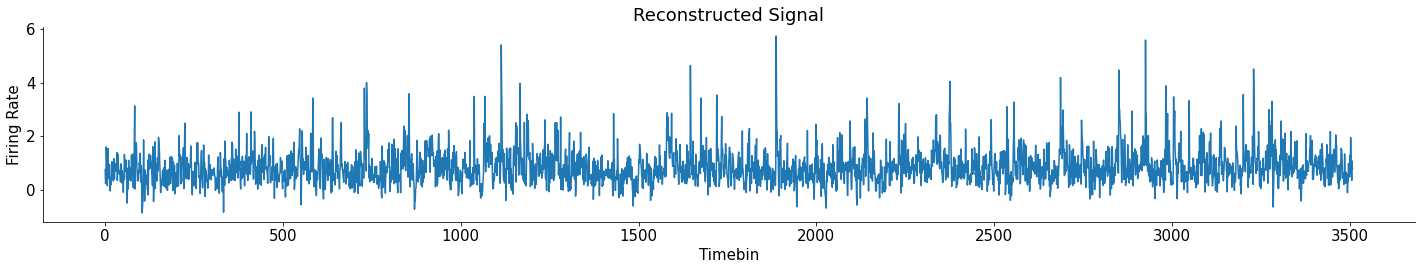

In [26]:
plt.plot(reconstruction[:,0])
plt.title("Reconstructed Signal")
plt.xlabel("Timebin")
plt.ylabel("Firing Rate")

Text(0, 0.5, 'Firing Rate')

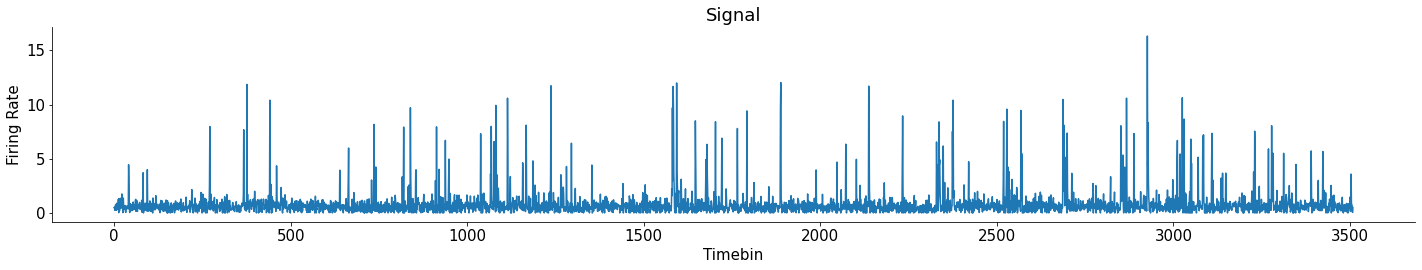

In [27]:
plt.plot(original_signal[:,0])
plt.title("Signal")
plt.xlabel("Timebin")
plt.ylabel("Firing Rate")

## Data Loader 


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.cuda.empty_cache()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# set the seed
np.random.seed(42)

# number of neurons 
NN = dataRNN.shape[0]

In [ ]:
# swapping the axes to maintain consistency with seq2seq notebook in the following code - the network takes all the neurons at a time step as input, not just one neuron

# avgd_normed_dataRNN = np.swapaxes(avgd_normed_dataRNN, 0, 1)
avgd_normed_dataRNN.shape

(7840, 3509)

In [ ]:
frac = 4/5

#x1 = torch.from_numpy(dataRNN[:,:int(frac*dataRNN.shape[1])]).to(device).float().unsqueeze(0)
#x2 = torch.from_numpy(dataRNN[:,int(frac*dataRNN.shape[1]):]).to(device).float().unsqueeze(0)
#x1 = torch.from_numpy(avgd_normed_dataRNN[:1131,:]).to(device).float().unsqueeze(2)
#x2 = torch.from_numpy(avgd_normed_dataRNN[:1131,:]).to(device).float().unsqueeze(2)

n_neurs = 6723//9
# let's use n_neurs/10 latent components
ncomp = int(n_neurs/10)

x1_train = torch.from_numpy(avgd_normed_dataRNN[:n_neurs,:int(frac*avgd_normed_dataRNN.shape[1])]).to(device).float().unsqueeze(2)
x2_train = torch.from_numpy(avgd_normed_dataRNN[:n_neurs,:int(frac*avgd_normed_dataRNN.shape[1])]).to(device).float().unsqueeze(2)

x1_valid = torch.from_numpy(avgd_normed_dataRNN[:n_neurs,int(frac*avgd_normed_dataRNN.shape[1]):]).to(device).float().unsqueeze(2)
x2_valid = torch.from_numpy(avgd_normed_dataRNN[:n_neurs,int(frac*avgd_normed_dataRNN.shape[1]):]).to(device).float().unsqueeze(2)

NN1 = x1_train.shape[0]
NN2 = x2_train.shape[0]


In [ ]:
class Net(nn.Module):
    def __init__(self, ncomp, NN1, NN2, bidi=True):
        super(Net, self).__init__()

        # play with some of the options in the RNN!
        
        self.rnn = nn.LSTM(NN1, ncomp, num_layers = 1, dropout = 0.,
                         bidirectional = bidi)
        """
        self.rnn = nn.RNN(NN1, ncomp, num_layers = 1, dropout = 0,
                    bidirectional = bidi, nonlinearity = 'tanh')
        self.rnn = nn.GRU(NN1, ncomp, num_layers = 1, dropout = 0,
                         bidirectional = bidi)
        """
        
        self.mlp = nn.Sequential(
                    nn.Linear(ncomp, ncomp*5),
                    nn.Mish(),
                    nn.Dropout(),
                    nn.Linear(ncomp*5, ncomp*5),
                    nn.Mish(),
                    nn.Dropout(),
                    nn.Linear(ncomp*5, ncomp), 
                    nn.Mish())
        
        self.fc = nn.Linear(ncomp, NN2)

    def forward(self, x):
        x = x.permute(1, 2, 0)
        #print(x.shape)
        # h_0 = torch.zeros(2, x.size()[1], self.ncomp).to(device)
        
        y, h_n = self.rnn(x)

        #print(y.shape)
        #print(h_n.shape)
        if self.rnn.bidirectional:
          # if the rnn is bidirectional, it concatenates the activations from the forward and backward pass
          # we want to add them instead, so as to enforce the latents to match between the forward and backward pass
            q = (y[:, :, :ncomp] + y[:, :, ncomp:])/2
        else:
            q = y
        
        q = self.mlp(q)

        # the softplus function is just like a relu but it's smoothed out so we can't predict 0
        # if we predict 0 and there was a spike, that's an instant Inf in the Poisson log-likelihood which leads to failure
        #z = F.softplus(self.fc(q), 10)
        #print(q.shape)
        z = self.fc(q).permute(2, 0, 1)
        # print(z.shape)
        return z, q

In [ ]:
# we initialize the neural network
net = Net(ncomp, NN1, NN2, bidi = True).to(device)

# special thing:  we initialize the biases of the last layer in the neural network
# we set them as the mean firing rates of the neurons.
# this should make the initial predictions close to the mean, because the latents don't contribute much
net.fc.bias.data[:] = x1_train.mean(axis = (0,1))

# we set up the optimizer. Adjust the learning rate if the training is slow or if it explodes.
optimizer1 = torch.optim.Adam(net.parameters(), lr=.0001)
# optimizer2 = torch.optim.SGD(net.parameters(), lr = 0.0001, momentum = 0.9, weight_decay = 0.01, )
# optimizer3 = torch.optim.

In [ ]:
# forward check 
# net(x1)
net(x1_train)

## Training 

In [ ]:
from tqdm import tqdm

In [ ]:
from sam import SAM

base_optimizer = torch.optim.Adam  # define an optimizer for the "sharpness-aware" update
optimizer = SAM(net.parameters(), base_optimizer, lr=0.001, weight_decay = 1e-5)#, momentum=0.9)

# you can keep re-running this cell if you think the cost might decrease further

cost = nn.MSELoss()

#train_save = []
#valid_save = []

niter =  5500 # 
# rnn_loss = 0.2372, lstm_loss = 0.2340, gru_lstm = 0.2370
for k in tqdm(range(niter)):
    net.train()
    # the network outputs the single-neuron prediction and the latents
    z, y = net(x1_train)

    # our cost
    loss = cost(z, x2_train)

    # train the network as usual
    loss.backward()
    optimizer.first_step(zero_grad = True)
    
    cost(net(x1_train)[0],x2_train).backward()
    
    optimizer.second_step(zero_grad=True)
    
    with torch.no_grad():
        net.eval()
        train_save.append(loss.item())
        valid_loss = cost(net(x1_valid)[0], x2_valid)
        valid_save.append(valid_loss.item())

    if k % 50 == 0:
        with torch.no_grad():
            net.eval()
            valid_loss = cost(net(x1_valid)[0], x2_valid)
            
            print(f' iteration {k}, train cost {loss.item():.4f}, valid cost {valid_loss.item():.4f}')

In [ ]:
plt.plot(valid_save)
plt.plot(loss_save)

In [ ]:
"""
### Original training
# you can keep re-running this cell if you think the cost might decrease further

cost = nn.MSELoss()

niter = 5800
# rnn_loss = 0.2372, lstm_loss = 0.2340, gru_lstm = 0.2370
for k in tqdm(range(niter)):
    net.train()
    # the network outputs the single-neuron prediction and the latents
    z, y = net(x1_train)

    # our cost
    loss = cost(z, x2_train)

    # train the network as usual
    loss.backward()
    optimizer1.step()
    optimizer1.zero_grad()
    

    if k % 50 == 0:
        with torch.no_grad():
            net.eval()
            valid_loss = cost(net(x1_valid)[0], x2_valid)
            
            print(f' iteration {k}, train cost {loss.item():.4f}, valid cost {valid_loss.item():.4f}')

""";  

## Validation from same neurons

In [ ]:
test, hidden = net(x1_valid)

In [ ]:
plt.plot(x2_valid[7,:,0].cpu().detach().numpy())
plt.plot(test[7,:,0].cpu().detach().numpy())

## Testing neurons from same layer

In [ ]:
test, hidden = net(torch.from_numpy(avgd_normed_dataRNN[n_neurs:2*n_neurs,:]).unsqueeze(2).to(device).float())

In [ ]:
test.shape

In [ ]:
n_n = 15
plt.plot(test[n_n,:,0].cpu().detach().numpy())
plt.plot(avgd_normed_dataRNN[n_neurs + n_n,:])

## Testing neurons from another layer (#9)

In [ ]:
test, hidden = net(torch.from_numpy(avgd_normed_dataRNN[10000:10100,:]).unsqueeze(2).to(device).float())

In [ ]:
plt.plot(test[10,:,0].cpu().detach().numpy())
plt.plot(avgd_normed_dataRNN[10010,:])

# Training 9 Networks 
Each Network corresponds to a different layer in V1

In [ ]:
# you can keep re-running this cell if you think the cost might decrease further

cost = nn.MSELoss()

niter = 10000
# rnn_loss = 0.2372, lstm_loss = 0.2340, gru_lstm = 0.2370
for k in tqdm(range(niter)):
    net.train()
    # the network outputs the single-neuron prediction and the latents
    z, y = net(x1_train)

    # our cost
    loss = cost(z, x2_train)

    # train the network as usual
    loss.backward()
    optimizer1.step()
    optimizer1.zero_grad()

    if k % 50 == 0:
        with torch.no_grad():
            net.eval()
            valid_loss = cost(net(x1_valid)[0], x2_valid)
            
            print(f' iteration {k}, train cost {loss.item():.4f}, valid cost {valid_loss.item():.4f}')

    